In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log
import pmdarima as pm

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3801.375, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3674.943, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3676.824, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3661.923, Time=0.30 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=3651.052, Time=0.38 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=3646.718, Time=0.54 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3754.728, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3676.886, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3674.665, Time=0.27 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3656.854, Time=0.48 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=3648.156, Time=0.51 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3697.268, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3663.530, Time=0.15 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3654.958, Time=0.35 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3640.748, Time=0.49 sec
 ARIMA(3,2

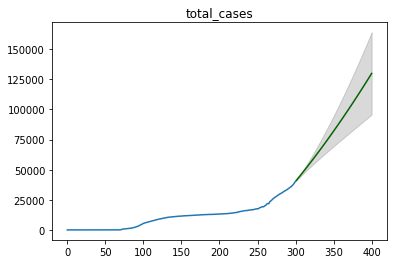

In [31]:
# def pred(country, indicator, periods):
country = 'Denmark'
indicator = 'total_cases'
periods = 100

df = pd.read_csv('../assets/data/covid-data-2020-10-25.csv', delimiter = ",")
df = df[df['location'] == country][[indicator]].fillna(0).reset_index(drop = True)

model = pm.auto_arima(df, start_p = 0, start_q = 0,
                        test = 'kpss',       
                        max_p = 9, max_q = 9, 
                        m = 1,              
                        d=None,           
                        seasonal=False, 
                        trace = True,
                        error_action = 'ignore',  
                        suppress_warnings = True, 
                        stepwise = False)
forecast, confint = model.predict(periods, return_conf_int = True)
index_of_fc = np.arange(len(df), len(df) + periods)

# make series for plotting purpose
forecast_series = pd.Series(forecast, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index = index_of_fc)
upper_series = pd.Series(confint[:, 1], index = index_of_fc)
# конец содержательной части

# Plot
plt.plot(df)
plt.plot(forecast_series, color = 'darkgreen')
plt.fill_between(lower_series.index, 
                lower_series, 
                upper_series, 
                color = 'k', alpha = .15)

plt.title(indicator)
plt.show()
# return model

In [33]:
forecast_series

301     41136.285683
302     41882.593100
303     42666.959131
304     43471.287184
305     44236.696171
           ...      
396    125897.630092
397    126910.684949
398    127925.298926
399    128941.151729
400    129960.952001
Length: 100, dtype: float64

In [32]:
df

,total_cases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
296,37003.0
297,37763.0
298,38622.0
299,39411.0
